In [1]:
import scanpy as sc
import scTenifoldXct as st
from scTenifoldXct.visualization import get_Xct_pairs, plot_XNet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load scRNA-seq data
adata = sc.read_h5ad('data/adata_short_example.h5ad')
adata

AnnData object with n_obs × n_vars = 202 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'ident'
    layers: 'log1p', 'raw'

In [5]:
# build a scTenifoldXct object, including GRNs
xct = st.scTenifoldXct(data = adata, 
                        source_celltype = 'Inflam. FIB',
                        target_celltype = 'Inflam. DC',
                        obs_label = 'ident',
                        rebuild_GRN = True, # timer
                        GRN_file_dir = 'Net_example_ray',  
                        verbose = True,
                        n_cpus = 8)

(cell, feature): (121, 3000)
(cell, feature): (81, 3000)
selected 328 LR pairs
building GRN of Inflam. FIB...
ray init, using 8 CPUs
execution time of making pcNet: 94.23 s
building GRN of Inflam. DC...
ray init, using 8 CPUs
execution time of making pcNet: 50.69 s
building correspondence...
concatenating GRNs...
scTenifoldXct init completed


In [ ]:
# # show model architecture
# xct.trainer.arch()

In [ ]:
# # load model if trained
# xct.nn_trainer.load_model_states('model_short_example')

In [6]:
# get embeddings
emb = xct.get_embeds(train = True)
emb.shape

training...: 100%|███████████████████████| 1000/1000 [03:06<00:00,  5.36it/s]


computing pair-wise euclidean distances...


(6000, 3)

In [ ]:
# # save model
# xct_obj.nn_trainer.save_model_states('model_short_example')

In [ ]:
# # show loss
# xct.plot_losses()

In [7]:
# get significant L-R pairs
xct_pairs = xct.null_test()
xct_pairs


Total enriched: 7 / 9000000


,ligand,receptor,dist,correspondence,p_val,enriched_rank
VCAM1_ITGB2,VCAM1,ITGB2,0.002518,68.917603,0.005156,1
CTGF_ITGB2,CTGF,ITGB2,0.004345,30.666880,0.012240,2
CYR61_ITGB2,CYR61,ITGB2,0.005057,20.410238,0.014196,3
CCL2_VEGFA,CCL2,VEGFA,0.006755,50.182056,0.019077,4
DCN_VEGFA,DCN,VEGFA,0.006797,120.625580,0.019210,5
SPON2_ITGB2,SPON2,ITGB2,0.009436,7.754211,0.033095,6
HLA-DMA_CD74,HLA-DMA,CD74,0.009572,50.203560,0.034304,7


In [8]:
# visualize the pairs
targets = get_Xct_pairs(xct_pairs)
targets[:5]

(['VCAM1', 'ITGB2'],
 ['CTGF', 'ITGB2'],
 ['CYR61', 'ITGB2'],
 ['CCL2', 'VEGFA'],
 ['DCN', 'VEGFA'])

loading GRN None...
undirected graph constructed: 
# of nodes: 21, # of edges: 20

loading GRN None...
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from VCAM1 to ITGB2 added


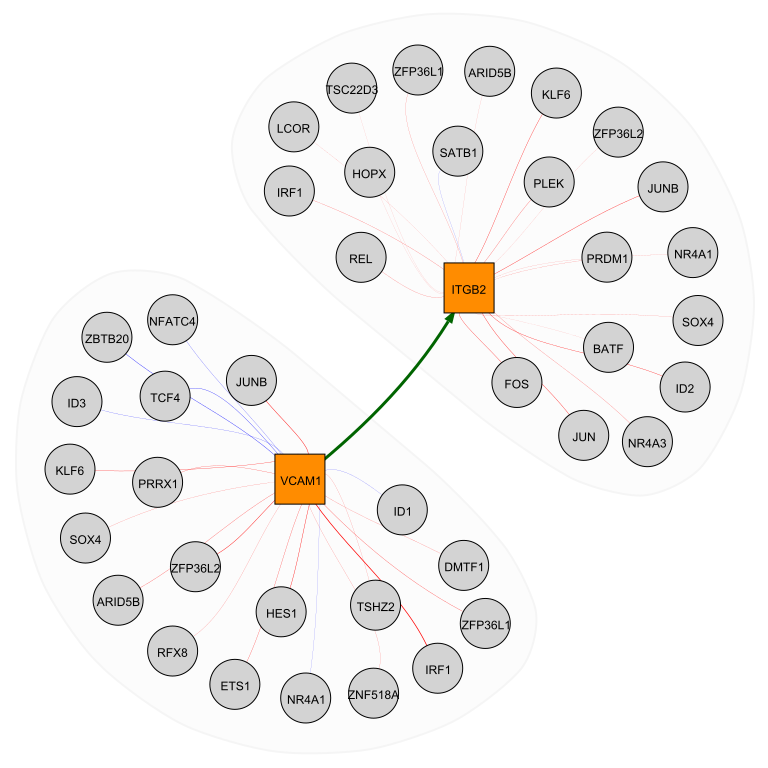

In [9]:
i = 0
s = xct.plot_pcNet_graph(view='sender', gene_names=[targets[i][0]],
                             top_edges=20, show = False, verbose = True)
t = xct.plot_pcNet_graph(view='receiver', gene_names=[targets[i][1]], 
                             top_edges=20, show = False, verbose = True)

plot_XNet(s, t, gene_pairs = [targets[i]], df_enriched = xct_pairs, show = True, verbose = True)